# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [2]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True
meas

In [3]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2022-12-18 13:52:56,867 | INFO : Running online!
2022-12-18 13:52:56,899 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2022-12-18 13:52:57,271 | INFO : 2022-12-18_13-52-57-271651
2022-12-18 13:52:57,315 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2022-12-18 13:52:57,546 | INFO : 2022-12-18_13-52-57-546824
2022-12-18 13:52:57,589 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2022-12-18 13:52:57,816 | INFO : 2022-12-18_13-52-57-816033
2022-12-18 13:52:57,857 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2022-12-18 13:52:58,086 | INFO : 2022-12-18_13-52-58-086520
2022-12-18 13:52:58,129 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.7275198049836102
2022-12-18 13:52:58,361 | INFO : 2022-12-18_13-52-58-361891
2022-12-18 13:52:58,432 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.1895998374863418
2022-12-18 13:52:58,678 | INFO : 2022-12-18_13-52-58-678639
2022-12-18 13:52:58,775 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0.34832013001092665
2022-12-18 13:52:59,016 | INFO : 2022-12-18_13-52-59-016157
2022-12-18 1

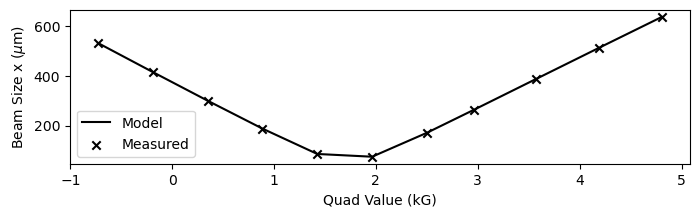

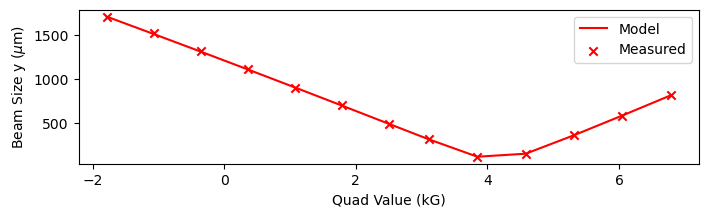

In [4]:
result = meas.measure_emittance()

# Examine results

In [5]:
import matplotlib.pyplot as plt

In [6]:
result

{'quadvalsx': array([-0.7275198 , -0.18959984,  0.34832013,  0.8862401 ,  1.42416007,
         1.96208003,  2.5       ,  2.96107426,  3.57583993,  4.19060561,
         4.80537129]),
 'beamsizesx': array([5.33170793e-04, 4.15717312e-04, 3.00163175e-04, 1.88072261e-04,
        8.63793147e-05, 7.53875799e-05, 1.70943725e-04, 2.63662724e-04,
        3.86718287e-04, 5.13187974e-04, 6.37019834e-04]),
 'beamsizeserrx': array([0.0356002 , 0.02317638, 0.01395166, 0.00586851, 0.0019614 ,
        0.00126466, 0.0060725 , 0.01042026, 0.02060725, 0.02627091,
        0.0429092 ]),
 'error_x': False,
 'emit_x': 6.478260982795238e-09,
 'norm_emit_x': 1.0141905497003722e-06,
 'beta_x': 9.832579808105526,
 'alpha_x': -1.9612358888291264,
 'emit_x_err': 1.7492761822592622e-07,
 'norm_emit_x_err': 2.738542608232189e-05,
 'beta_x_rel_err': 27.00224932130611,
 'alpha_x_rel_err': -1.8887928810506167e-15,
 'sigma_11': 6.369801813107032e-08,
 'sigma_12': 1.2705397936659468e-08,
 'sigma_22': 3.193113507418008e-0

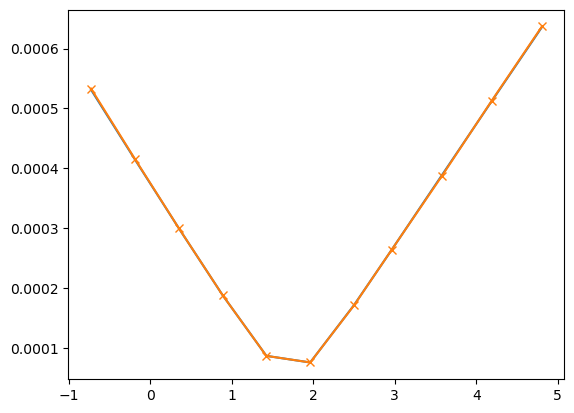

In [7]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

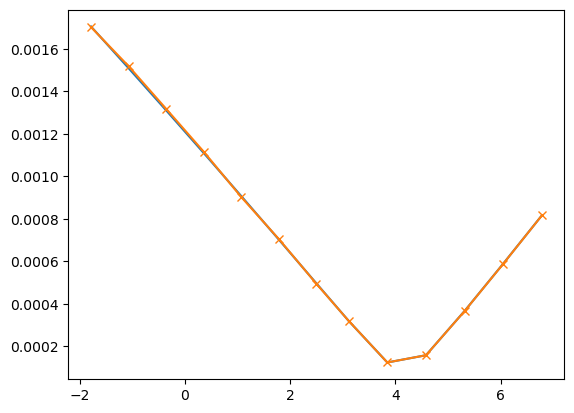

In [8]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Interactively change the quad and acquire the screen image

In [9]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
interact(f, quad_value=(-4, 4, .1))    

interactive(children=(FloatSlider(value=0.0, description='quad_value', max=4.0, min=-4.0), Output()), _dom_cla…

<function __main__.f(quad_value)>